## Reto 3: Gráficas de Dispersión

### 1. Objetivos:
    - Aprender a generar e interpretar gráficas de dispersión
    - Utilizar gráficas de dispersión para complementar el análisis hecho con la matriz de correlación

---
    
### 2. Desarrollo:

Espero que haya quedado claro en el Ejemplo pasado que las gráficas de dispersión pueden ser extremadamente útiles para encontrar incosistencias, errores y valores atípicos en nuestro dataset.

Vamos a complementar el análisis realizado en el Reto pasado con unas gráficas de dispersión. El objetivo de este Reto es utilizar todas las herramientas que hemos acumulado hasta el momento para preparar nuestro dataset para realizar predicciones con él. Vamos a volver a utilizar el dataset 'wine_quality_red-clean.csv'. Realiza los siguientes pasos:

1. Vuelve a generar tu matriz de correlaciones para tenerla disponible
2. Realiza gráficas de dispersión de los pares de variables que parezcan más prometedores (en los que la fuerza de la correlación sea más fuerte)
3. También realiza gráficas de dispersión de los pares de variables que no tengan un coeficiente de correlación alto, **pero** que tú creas intuitivamente que *deberían* de tener una correlación.
4. Utilizando estas gráficas de dispersión, y complementando el análisis con promedios, medianas, desviación estándar, boxplots e histogramas, elimina del dataset los valores que consideres como atípicos.
5. Crea una nueva matriz de correlación para ver si tus coeficientes han sido modificados o no.
6. Comenta con tus compañeros y la experta tus hallazgos.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


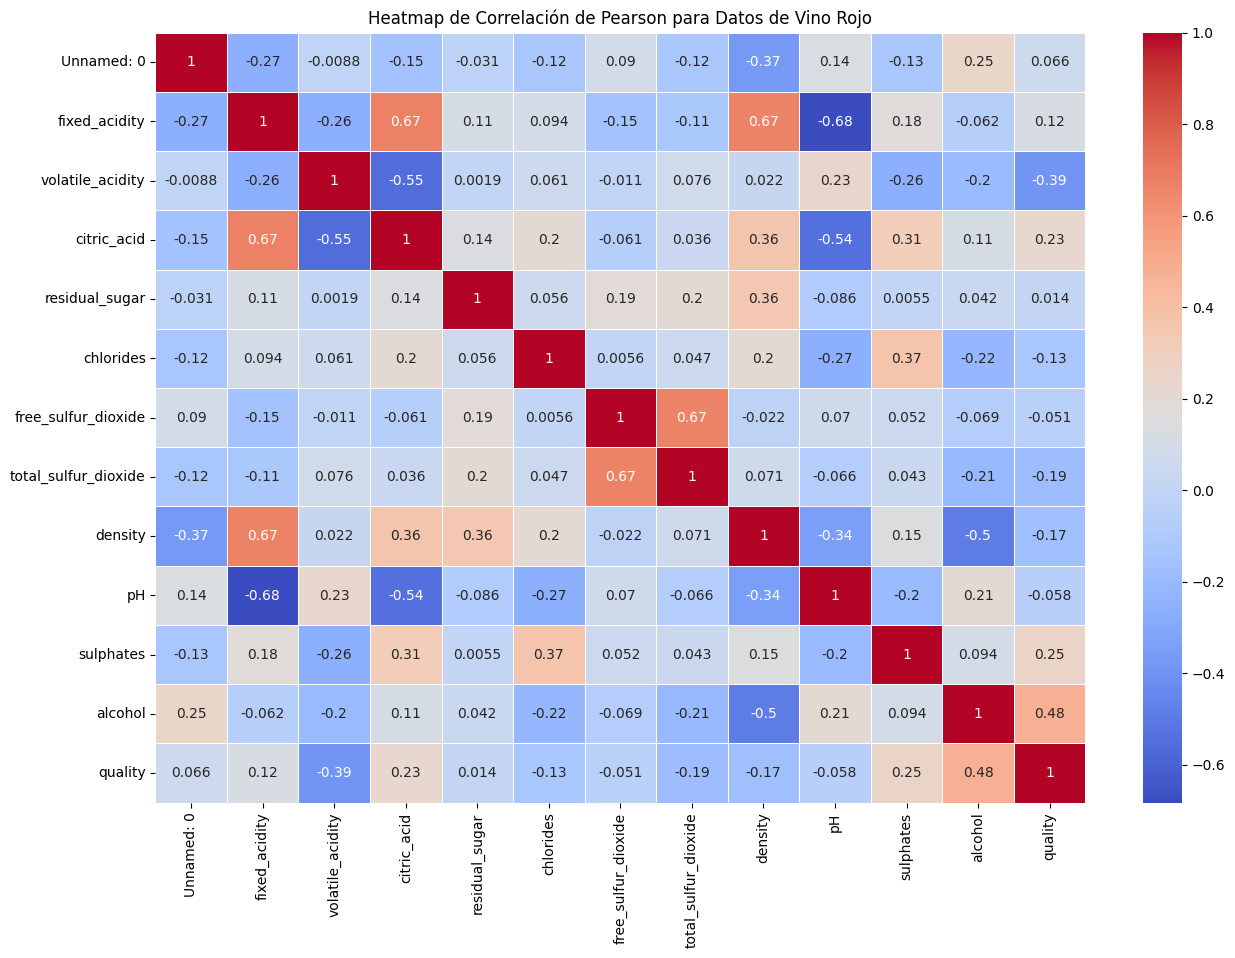

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

wine_data = pd.read_csv('/content/drive/MyDrive/Remoto Datasets/Remoto wine_quality_red-clean.csv')

# Regenerar la matriz de correlación
correlation_matrix = wine_data.corr()

# Crear un heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap de Correlación de Pearson para Datos de Vino Rojo')
plt.show()

Realizar gráficas de dispersión de los pares de variables más prometedores.

Vamos a elegir algunos de los pares de variables con correlaciones más fuertes y crear gráficas de dispersión para ellos. Algunos pares que podríamos considerar, basados en la matriz de correlaciones, son:

fixed_acidity y density
volatile_acidity y citric_acid
density y alcohol

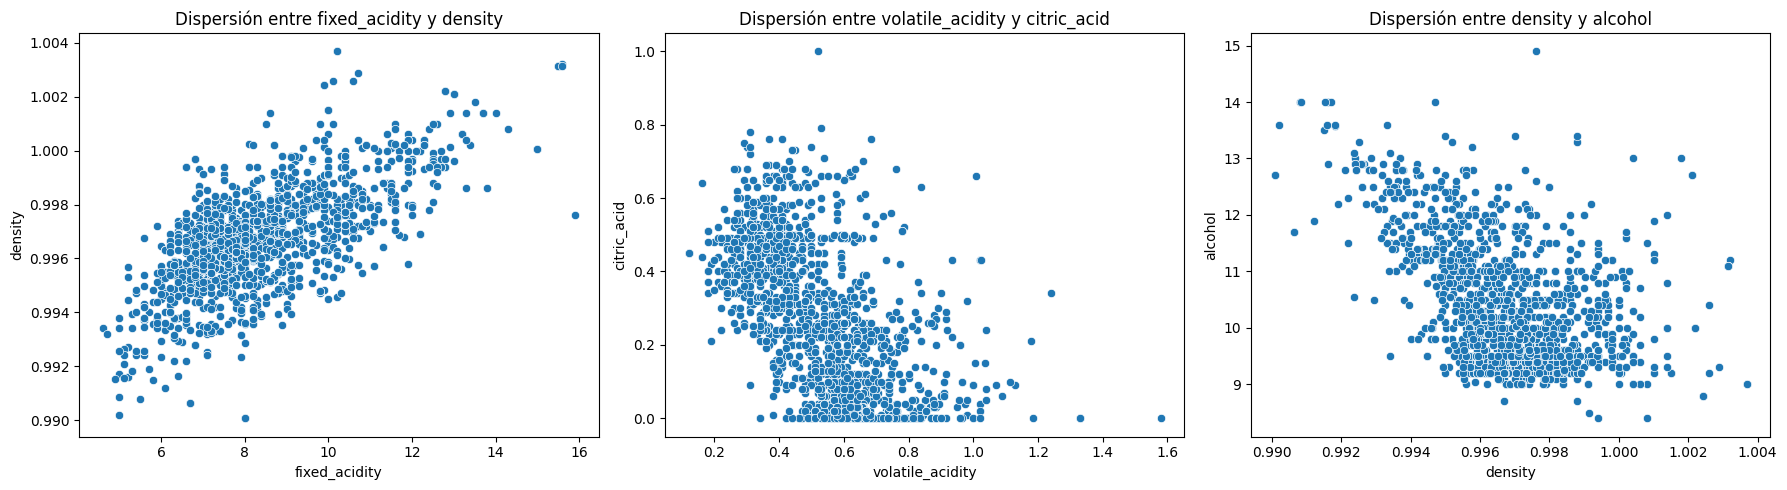

In [5]:
# Pares de variables a visualizar
variable_pairs = [('fixed_acidity', 'density'),
                  ('volatile_acidity', 'citric_acid'),
                  ('density', 'alcohol')]

# Crear gráficas de dispersión para estos pares
plt.figure(figsize=(18, 5))

for i, (var1, var2) in enumerate(variable_pairs, start=1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x=wine_data[var1], y=wine_data[var2])
    plt.title(f"Dispersión entre {var1} y {var2}")

plt.tight_layout()
plt.show()

Las gráficas de dispersión nos muestran la relación entre estos pares de variables. Podemos observar tendencias lineales en las gráficas, lo que concuerda con las correlaciones que observamos en el heatmap.

**Realizar gráficas de dispersión de los pares de variables intuitivamente interesantes.**

Aunque las correlaciones no sean altas, podría ser interesante explorar la relación entre las siguientes variables, basándonos en una intuición acerca de cómo podría influir la composición química en la calidad del vino:

residual_sugar y quality
chlorides y quality
pH y quality

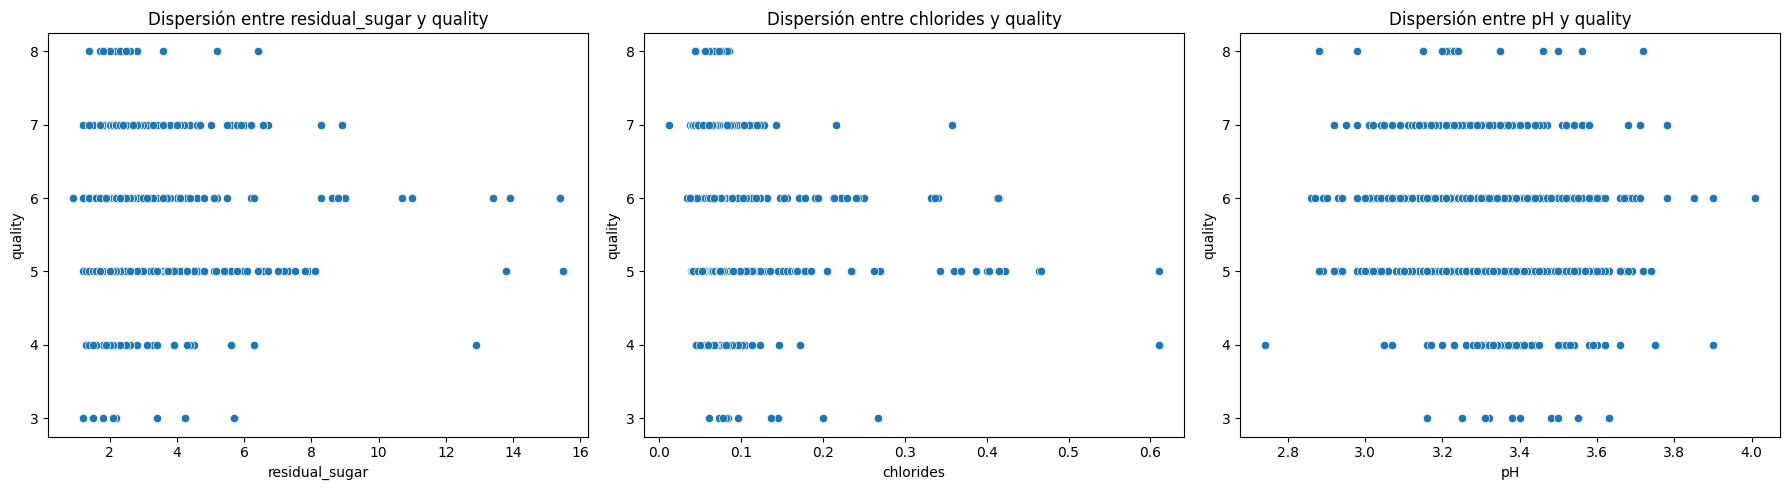

In [6]:
# Pares de variables intuitivamente interesantes
intuitive_pairs = [('residual_sugar', 'quality'),
                   ('chlorides', 'quality'),
                   ('pH', 'quality')]

# Crear gráficas de dispersión para estos pares
plt.figure(figsize=(18, 5))

for i, (var1, var2) in enumerate(intuitive_pairs, start=1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x=wine_data[var1], y=wine_data[var2])
    plt.title(f"Dispersión entre {var1} y {var2}")

plt.tight_layout()
plt.show()


Las gráficas de dispersión de los pares intuitivamente interesantes muestran que, si bien hay una dispersión de datos, no parece haber una tendencia clara entre estas variables y la calidad del vino.

**Análisis estadístico y eliminación de valores atípicos.**

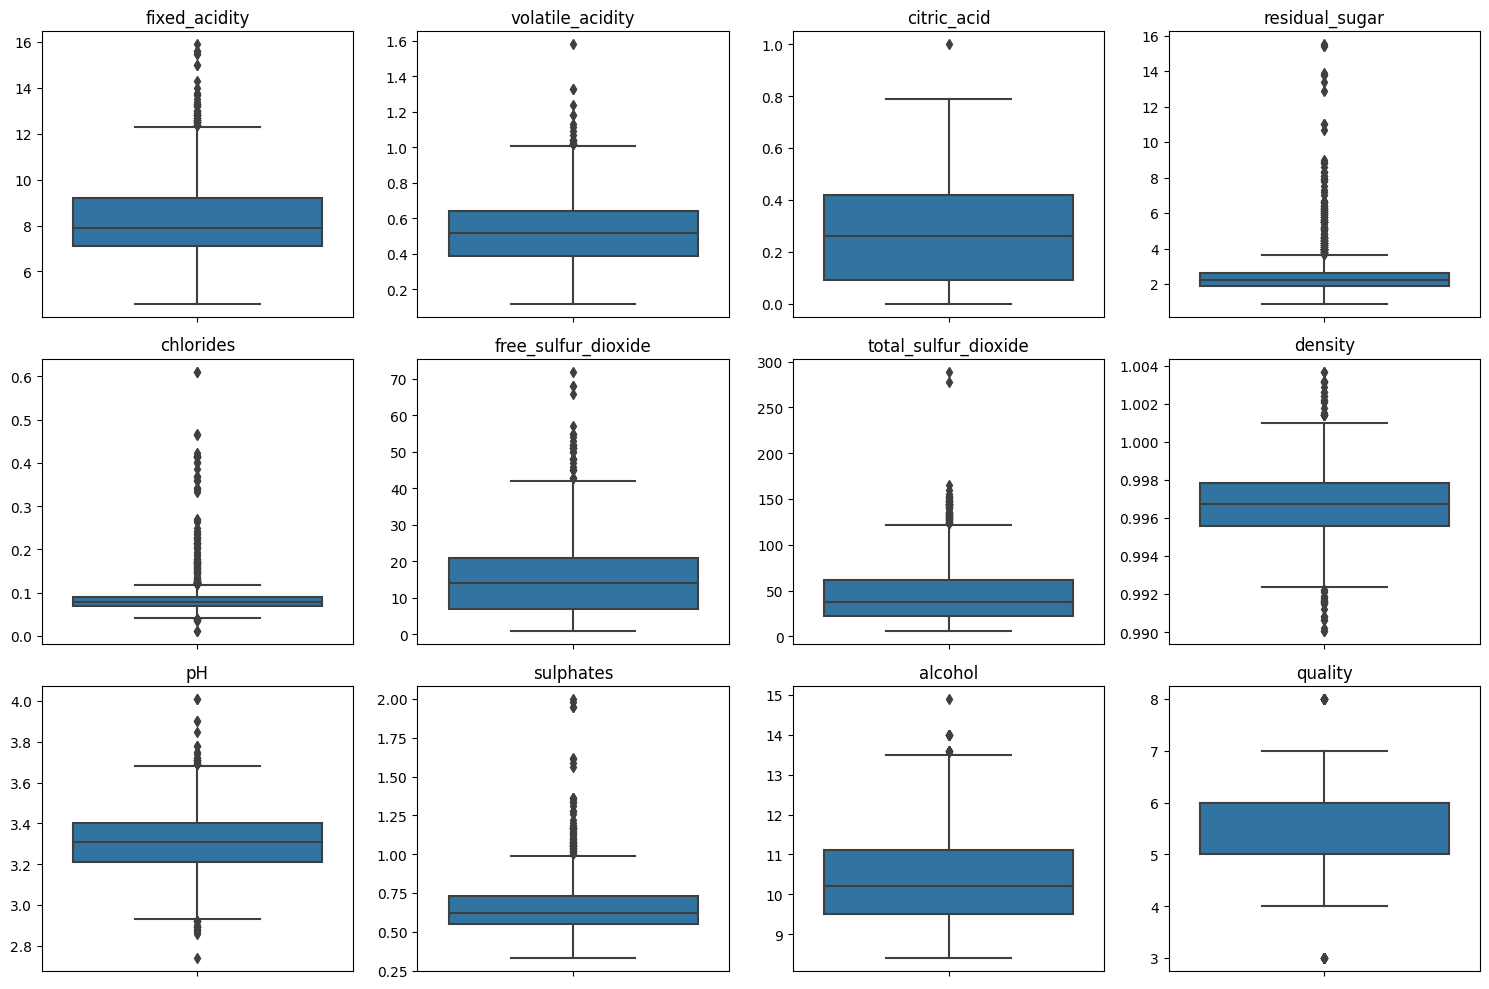

In [8]:
# Crear boxplots para cada variable
columns_to_plot = wine_data.columns[1:]  # Excluimos 'Unnamed: 0'

plt.figure(figsize=(15, 10))

for i, column in enumerate(columns_to_plot, start=1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=wine_data[column])
    plt.title(column)
    plt.ylabel("")

plt.tight_layout()
plt.show()


Los boxplots nos muestran la distribución de cada variable y nos ayudan a identificar valores atípicos. Podemos observar que hay algunas variables, como residual_sugar, chlorides, free_sulfur_dioxide, total_sulfur_dioxide y sulphates, que tienen valores atípicos evidentes.

In [9]:
# Identificar y eliminar valores atípicos usando IQR
Q1 = wine_data.quantile(0.25)
Q3 = wine_data.quantile(0.75)
IQR = Q3 - Q1

# Filtrar los datos para mantener solo las filas sin valores atípicos
filtered_data = wine_data[~((wine_data < (Q1 - 1.5 * IQR)) | (wine_data > (Q3 + 1.5 * IQR))).any(axis=1)]

# Comparar el tamaño original con el tamaño después de eliminar valores atípicos
original_size = wine_data.shape[0]
filtered_size = filtered_data.shape[0]

original_size, filtered_size


(1599, 1179)

Después de eliminar los valores atípicos usando el criterio del rango intercuartil (IQR), el tamaño del conjunto de datos se redujo de 1599 a 1179 registros.

Crear una nueva matriz de correlación.
Vamos a generar una nueva matriz de correlaciones utilizando el conjunto de datos filtrado para ver si los coeficientes han cambiado.

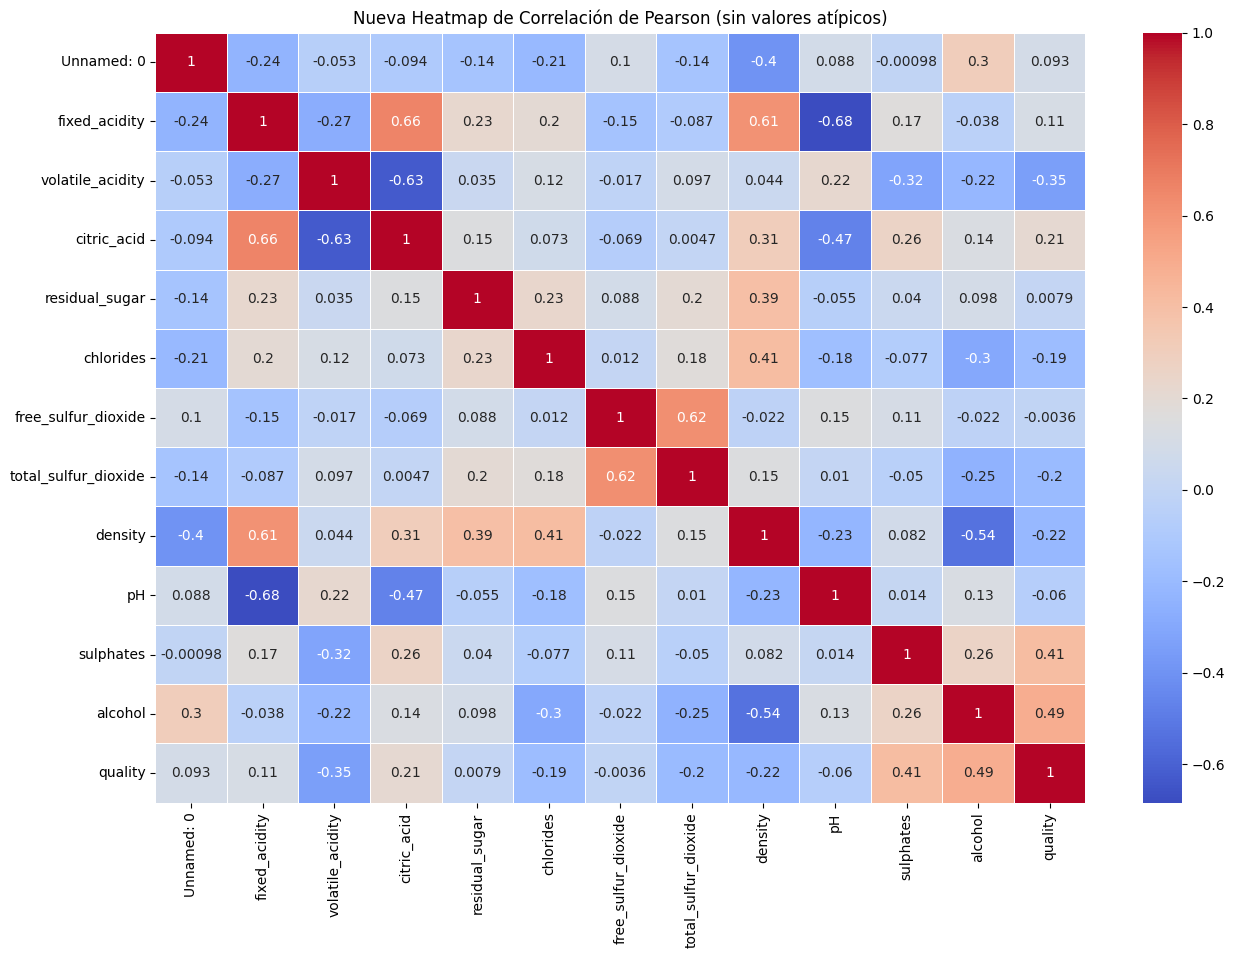

In [10]:
# Calcular la nueva matriz de correlación con datos filtrados
new_correlation_matrix = filtered_data.corr()

# Crear un heatmap para la nueva matriz de correlación
plt.figure(figsize=(15, 10))
sns.heatmap(new_correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Nueva Heatmap de Correlación de Pearson (sin valores atípicos)')
plt.show()


Hemos creado una nueva matriz de correlación después de eliminar los valores atípicos. Al comparar esta matriz con la original, podemos observar que algunos coeficientes han cambiado, aunque la estructura general sigue siendo similar. La eliminación de valores atípicos puede influir en las correlaciones al reducir el ruido en los datos, lo que puede mejorar la precisión de los modelos de predicción que se entrenen con estos datos.